<a href="https://colab.research.google.com/github/NikhilGurrapu/KMeans_Clustering/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [27]:
data=pd.read_csv('crime_data.csv')

In [28]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [29]:
new_data=data.iloc[:,data.columns!= 'Unnamed: 0']
inplace=True

In [30]:
new_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [31]:
scaler=MinMaxScaler()
norm_data=new_data.copy()

In [32]:
def minmaxscaler(x):
  for colName, colData in x.iteritems():
    x[colName]=scaler.fit_transform(np.array(colData).reshape(-1,1))

In [33]:
minmaxscaler(norm_data)

In [34]:
norm_data.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 1.0, 'Elbow Curve to find optimum K')

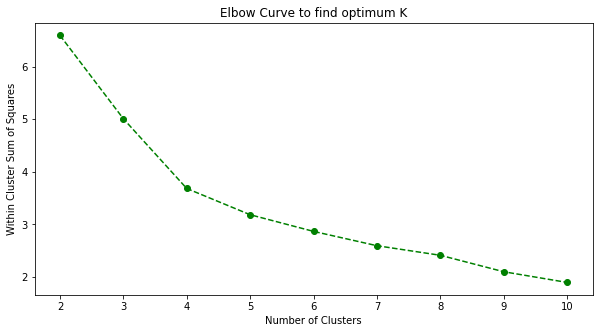

In [35]:
k=list(range(2,11))
ssd=[]

for i in k:
   kmeans=KMeans(n_clusters=i)
   kmeans.fit(norm_data)
   ssd.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(k,ssd,'go--')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.title('Elbow Curve to find optimum K')

In [36]:
kmeans4=KMeans(n_clusters=4)

kmeans4.fit(norm_data)

y_pred=kmeans4.fit_predict(norm_data)
print(y_pred)

data['Cluster_Group']=y_pred+1

[1 2 2 1 2 2 3 3 2 1 3 0 2 3 0 3 0 1 0 2 3 2 0 1 3 0 0 2 0 3 2 2 1 0 3 3 3
 3 3 1 0 1 2 3 0 3 3 0 0 3]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster_Group
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,3


In [38]:
centroids = kmeans4.cluster_centers_
centroids = pd.DataFrame(centroids, columns=['Murder', 'Assault','UrbanPop','Rape'])
centroids.index = np.arange(1,len(centroids)+1)
centroids

,Murder,Assault,UrbanPop,Rape
1,0.168675,0.114858,0.340287,0.126019
2,0.791416,0.680223,0.368644,0.364664
3,0.612450,0.750000,0.754237,0.679802
4,0.304394,0.329371,0.705882,0.310990


In [39]:
ssd

[6.596893867946196,
 5.010878493006417,
 3.6834561535859134,
 3.1842618139677223,
 2.867216131683527,
 2.5948238289134555,
 2.4124489980734127,
 2.0993709240464566,
 1.8961030808193795]

<AxesSubplot:xlabel='UrbanPop', ylabel='Rape'>

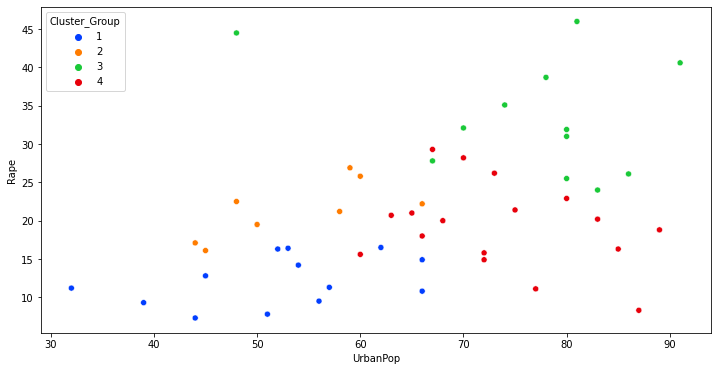

In [40]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set_palette("pastel")
sns.scatterplot(x=data['UrbanPop'],y=data['Rape'],hue=data['Cluster_Group'],palette='bright')

<AxesSubplot:xlabel='Murder', ylabel='Assault'>

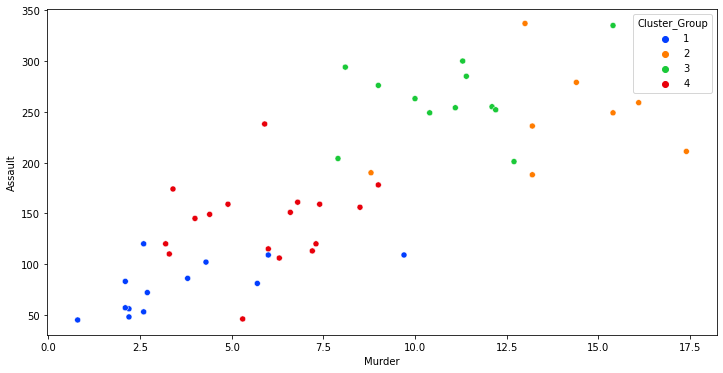

In [41]:
plt.figure(figsize=(12,6))
sns.set_palette("pastel")
sns.scatterplot(x=data['Murder'],y=data['Assault'],hue=data['Cluster_Group'],palette='bright')

<AxesSubplot:xlabel='Murder', ylabel='UrbanPop'>

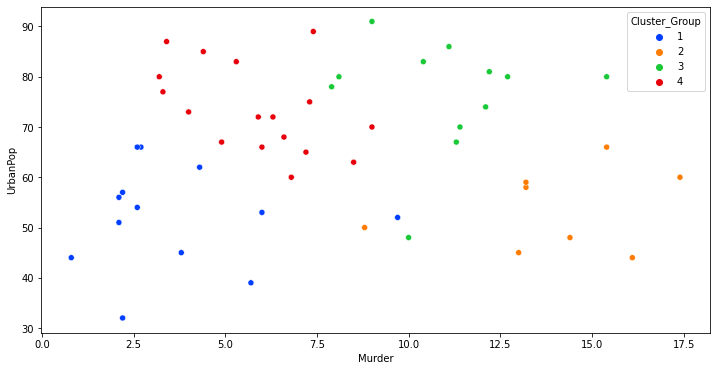

In [42]:
plt.figure(figsize=(12,6))
sns.set_palette("pastel")
sns.scatterplot(x=data['Murder'],y=data['UrbanPop'],hue=data['Cluster_Group'],palette='bright')